In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Importing the data from CSV-files and setting extent and resolution, example without faults
geo_data = gp.create_data([0,3000,0,200,0,2000],resolution=[120,4,80], 
                         path_o = "C:/Users/Jan/gempy/notebooks/input_data/tutorial_ch3_foliations", # importing orientation (foliation) data
                         path_i = "C:/Users/Jan/gempy/notebooks/input_data/tutorial_ch3_interfaces") # importing point-positional interface data

In [3]:
# Importing the data from CSV-files and setting extent and resolution, example with faults
# geo_data = gp.create_data([0,2000,0,2000,0,2000],[100,100,100], 
#                          path_o = "C:/Users/Jan/gempy/notebooks/input_data/tut_chapter1/simple_fault_model_orientations.csv", # importing orientation (foliation) data
#                          path_i = "C:/Users/Jan/gempy/notebooks/input_data/tut_chapter1/simple_fault_model_points.csv") # importing point-positional interface data

In [4]:
gp.get_data(geo_data)

G_x       G_y       G_z       X      Y            Z  \
interfaces   0        NaN       NaN       NaN   250.0    0.0   996.000000   
             1        NaN       NaN       NaN   750.0  100.0  1299.000000   
             2        NaN       NaN       NaN   500.0  200.0  1149.000000   
             3        NaN       NaN       NaN  2750.0    0.0   995.000000   
             4        NaN       NaN       NaN  2250.0  100.0  1298.000000   
             5        NaN       NaN       NaN  2500.0  200.0  1149.000000   
             6        NaN       NaN       NaN  2500.0  200.0   949.000000   
             7        NaN       NaN       NaN  2250.0  100.0  1098.000000   
             8        NaN       NaN       NaN   750.0  100.0  1099.000000   
             9        NaN       NaN       NaN   500.0  200.0   949.000000   
             10       NaN       NaN       NaN  2750.0    0.0   795.000000   
             11       NaN       NaN       NaN   250.0    0.0   796.000000   
             12       NaN       NaN       NaN  2250.0  100.0   898.000000   
             13       NaN       NaN       NaN  2500.0  200.0   749.000000   
             14       NaN       NaN       NaN   250.0    0.0   596.000000   
             15       NaN       NaN       NaN  2750.0    0.0   595.000000   
             16       NaN       NaN       NaN   500.0  200.0   749.000000   
             17       NaN       NaN       NaN   750.0  100.0   899.000000   
             18       NaN       NaN       NaN  2750.0    0.0   395.000000   
             19       NaN       NaN       NaN   500.0  200.0   549.000000   
             20       NaN       NaN       NaN  2500.0  200.0   549.000000   
             21       NaN       NaN       NaN  2250.0  100.0   698.000000   
             22       NaN       NaN       NaN   250.0    0.0   396.000000   
             23       NaN       NaN       NaN   750.0  100.0   699.000000   
             24       NaN       NaN       NaN     0.0    0.0     0.000000   
orientations 0  -0.516992 -0.008559  0.855947   500.0  100.0  1148.000000   
             1   0.516122 -0.014273  0.856397  2500.0  100.0  1147.333333   

                    azimuth        dip formation  formation_number  isFault  \
interfaces   0          NaN        NaN   Layer 2                 1    False   
             1          NaN        NaN   Layer 2                 1    False   
             2          NaN        NaN   Layer 2                 1    False   
             3          NaN        NaN   Layer 2                 1    False   
             4          NaN        NaN   Layer 2                 1    False   
             5          NaN        NaN   Layer 2                 1    False   
             6          NaN        NaN   Layer 3                 2    False   
             7          NaN        NaN   Layer 3                 2    False   
             8          NaN        NaN   Layer 3                 2    False   
             9          NaN        NaN   Layer 3                 2    False   
             10         NaN        NaN   Layer 3                 2    False   
             11         NaN        NaN   Layer 3                 2    False   
             12         NaN        NaN   Layer 4                 3    False   
             13         NaN        NaN   Layer 4                 3    False   
             14         NaN        NaN   Layer 4                 3    False   
             15         NaN        NaN   Layer 4                 3    False   
             16         NaN        NaN   Layer 4                 3    False   
             17         NaN        NaN   Layer 4                 3    False   
             18         NaN        NaN   Layer 5                 4    False   
             19         NaN        NaN   Layer 5                 4    False   
             20         NaN        NaN   Layer 5                 4    False   
             21         NaN        NaN   Layer 5                 4    False   
             22         NaN        NaN   Layer 5

In [5]:
# Assigning series to formations as well as their order (timewise) #THIS IS WRONG FOR NO FAULT
#gp.set_series(geo_data, {"Fault_Series":'Main_Fault', 
#                      "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1')},
#                      order_series = ["Fault_Series", 'Strat_Series'],
#                       order_formations=['Main_Fault', 
#                                         'Sandstone_2','Siltstone', 'Shale', 'Sandstone_1',
#                                         ], verbose=0)

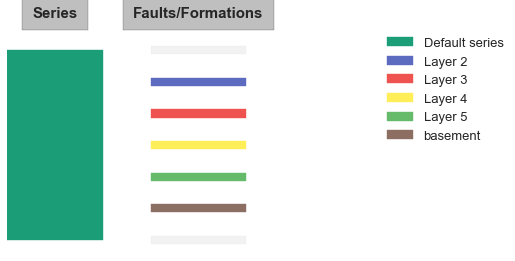

In [6]:
%matplotlib inline
gp.get_sequential_pile(geo_data)

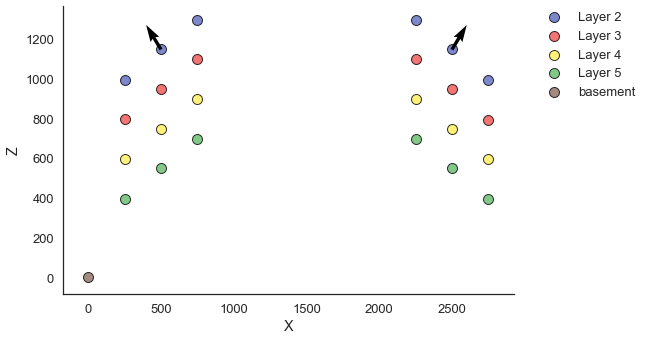

In [7]:
%matplotlib inline
gp.plotting.plot_data(geo_data, direction='y')

In [8]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')
#print(interp_data)

Compiling theano function...


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [9]:
lith_block, fault_block = gp.compute_model(interp_data)

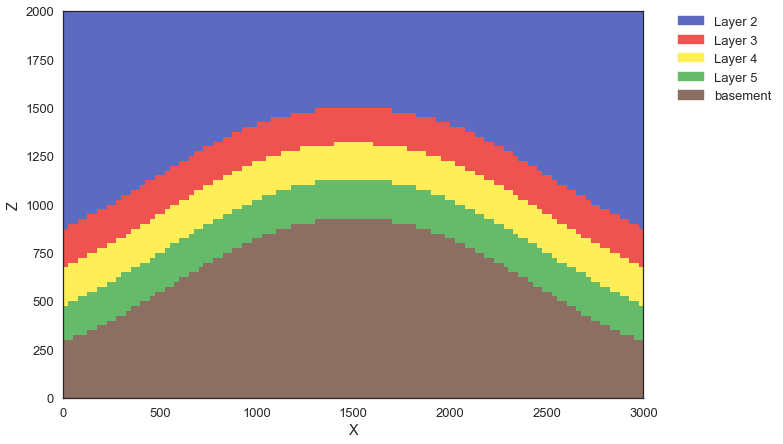

In [10]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=2,  direction='y', plot_data=False)

In [11]:
#gp.plotting.plot_section(geo_data, lith_block[0], 2, plot_data=True)
#ax = plt.gca()

# Adding grid
#ax.set_xticks(np.linspace(0, 2000, 100, endpoint=False))
#ax.set_yticks(np.linspace(0, 2000, 100, endpoint=False))
#plt.grid()

#plt.ylim(800,1600)
#plt.figure(figsize=[400,200])

In [12]:
print(lith_block)

[[ 4.9967146  4.994464   4.9907537 ...  1.1666322  1.245561   1.3462143]
 [40.574844  40.581936  40.58903   ... 41.12444   41.131187  41.137928 ]]


In [13]:
geo_data.extent

array([   0, 3000,    0,  200,    0, 2000])

In [14]:
geo_data.grid.values

array([[1.2500000e+01, 8.3333331e-01, 8.3333330e+00],
       [1.2500000e+01, 8.3333331e-01, 3.3438820e+01],
       [1.2500000e+01, 8.3333331e-01, 5.8544304e+01],
       ...,
       [2.9875000e+03, 1.9916667e+02, 1.9414557e+03],
       [2.9875000e+03, 1.9916667e+02, 1.9665612e+03],
       [2.9875000e+03, 1.9916667e+02, 1.9916666e+03]], dtype=float32)

In [15]:
vertices, simplices = gp.get_surfaces(interp_data, lith_block[1], None, original_scale=True)

In [16]:
geo_data.grid.values[:,0];